# Python Interactive Notebook Comparisons

<b> Testing: </b>
    <li> Matplotlib </li>
    <li> MPLD3 </li>
    <li> Plotly </li>

## MPL3D

<b> Pros: </b>
<li> Flexibility </li>
<li> Gorgeous interactive images in notebook </li>
<li> Service request built in; %show points to new browser </li>

<b> Cons: </b>
<li> Complexity </li>
<li> Images disappear when pushed through Git!! (Tried %show, display, and notebook)</li>
<li> Axis showing up differently than in matplotlib plain </li>
<li> Legend colors disappeared </li>

In [7]:
import pysal as ps  # 1.5 or higher
import numpy as np  # 1.7 or higher
import pandas as pd # 0.10 or higher
import matplotlib 
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.cm import get_cmap
import random as rdm
from pylab import *
from pysal.contrib.viz import mapping as maps

from fiona import collection
from descartes import PolygonPatch
from itertools import imap


<IPython.core.display.Javascript object>


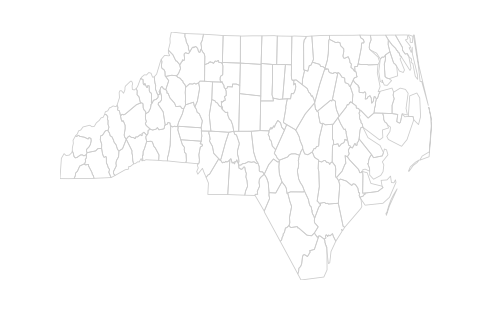

Reading from  /Users/Masia/anaconda/lib/python2.7/site-packages/pysal/examples/sids2/sids2.shp


/Users/Masia/anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/Users/Masia/anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/Users/Masia/anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/Users/Masia/anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/Users/Masia/anaconda/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: DeprecationWarning: Comm._topic_default is deprecated: use @default decorator instead.
  def _topic_default(self):
/Users/Masia/ana

In [8]:
shp_link = ps.examples.get_path('sids2.shp')
data = ps.open(shp_link)

fig = figure()

base = maps.map_poly_shp(data)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')

ax = maps.setup_ax([base], [data.bbox, data.bbox, data.bbox])
fig.add_axes(ax)
show()

print 'Reading from ', shp_link

In [9]:
# Calculate a spatial weight for our observations.
f = ps.open(ps.examples.get_path("sids2.dbf"))
b = np.array(f.by_col('BIR79'))
e = np.array(f.by_col('SID79'))
w = ps.open(ps.examples.get_path("sids2.gal")).read()
print w

In [10]:
# Calculate the Moran's I, & plot spatial lag versus our variable of interest.
mi = ps.esda.moran.Moran_Rate(e, b, w, two_tailed=False)
"%6.4f" % mi.I
"%6.4f" % mi.EI
"%6.4f" % mi.p_norm

mir=ps.Moran(e,w,permutations=9999)
mir.p_sim

0.0085000000000000006

/Users/Masia/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  warnings.warn(depdoc, DeprecationWarning)
/Users/Masia/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  warnings.warn(depdoc, DeprecationWarning)
/Users/Masia/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  warnings.warn(depdoc, DeprecationWarning)


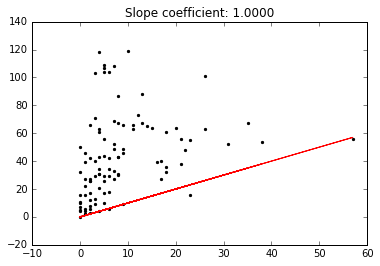

In [11]:
#Show a Moran scatterplot of SIDS79 and its Spatial Lag
scatter(e, w_sids79, marker='.', s=20, alpha=1, color='k')
fit = ps.spreg.OLS(e[:, None], e[:, None])
plot(e[:, None], fit.predy, color='r')
title("Slope coefficient: %.4f"%fit.betas[1])

In [12]:
# Calculate a LISA statistic
lisa_SIDS79 = ps.Moran_Local(e, w, permutations=9999)

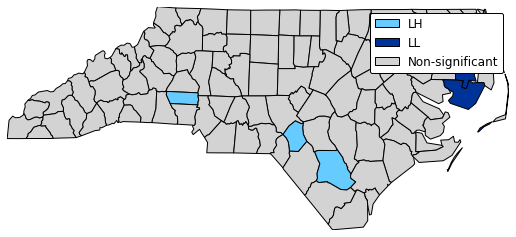

In [14]:
# Show LISA clusters
shp_link = ps.examples.get_path("sids2.shp")
lisamap_SIDS79 = maps.plot_lisa_cluster(shp_link, lisa_SIDS79, figsize=(9, 4))

## MPLD3 Exploration

In [21]:
f = ps.open(ps.examples.get_path("sids2.dbf"))
bir79 = np.array(f.by_col('BIR79'))
sids79 = np.array(f.by_col('SID79'))
w = ps.open(ps.examples.get_path("sids2.gal")).read()
w_sids79 = ps.lag_spatial(w, sids79)
x = sids79
y = w_sids79

# dither the data for clearer plotting
x += 0.1 * np.random.random(x.shape)

# Setup the figure and axis
fig, ax = plt.subplots(1, figsize=(7, 5))
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)

points = scatter(x, y, c=y, s=40, alpha=0.6)

plugins.connect(fig, plugins.LinkedBrush(points))

mpld3.display()